In [1]:
-m tkinter

SyntaxError: invalid syntax (Temp/ipykernel_16084/871295249.py, line 1)

In [2]:
from tkinter import *

In [1]:
from tkinter import *
from tkinter import ttk
root = Tk()
frm = ttk.Frame(root, padding=160)
frm.grid()
ttk.Label(frm, text="Hello World!").grid(column=0, row=0)
ttk.Button(frm, text="Quit", command=root.destroy).grid(column=1, row=0)
root.mainloop()

In [ ]:
from tkinter import *
from numpy import *
from matplotlib.pyplot import *

root = Tk()
root.title('UAMonitor')
root.iconbitmap('Documents/Mauricio/iGEM/Arduino/Espectro_Foto/Logo blanco iGEM.ico')
root.geometry("800x800")

def graph():
  t=linspace(0,5,100)
  y=sin(2*pi*1*t)
  plot(t,y)
  show()
  return

my_button= Button(root, command=graph)
my_button.pack()

root.mainloop()

In [7]:
import tkinter as tk

class App(tk.Frame):
    def __init__(self, master):
        super().__init__(master)
        self.pack()

        self.entrythingy = tk.Entry()
        self.entrythingy.pack()

        # Create the application variable.
        self.contents = tk.StringVar()
        # Set it to some value.
        self.contents.set("this is a variable")
        # Tell the entry widget to watch this variable.
        self.entrythingy["textvariable"] = self.contents

        # Define a callback for when the user hits return.
        # It prints the current value of the variable.
        self.entrythingy.bind('<Key-Return>',
                             self.print_contents)

    def print_contents(self, event):
        print("Hi. The current entry content is:",
              self.contents.get())

root = tk.Tk()
myapp = App(root)
myapp.mainloop()

In [1]:
import tkinter as tk
from tkinter import ttk
root = tk.Tk()
root.config(width=300, height=200)
root.title("Botón en Tk")
boton = ttk.Button(text="¡Hola, mundo!")
boton.place(x=50, y=50)
root.mainloop()

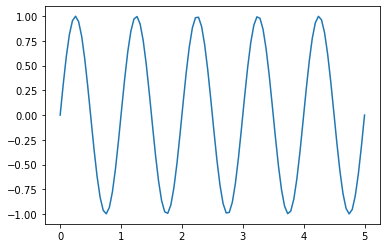

KeyboardInterrupt: 

In [4]:
import tkinter as tk
from tkinter import messagebox, ttk
from numpy import *
from matplotlib.pyplot import *
def saludar():
  t=linspace(0,5,100)
  y=sin(2*pi*1*t)
  plot(t,y)
  show()
  return
root = tk.Tk()
root.config(width=300, height=200)
root.title("Botón en Tk")
boton = ttk.Button(text="¡Hola, mundo!", command=saludar)
boton.place(x=50, y=50)
root.mainloop()

In [ ]:
from tkinter import *
from PIL import ImageTK,Image
import numpy as np
import mathplotlib.pyplot as plt

root = Tk()
root.title('UAMonitor')
root.iconbitmap('c://')

In [3]:
import tkinter

from matplotlib.backends.backend_tkagg import (
    FigureCanvasTkAgg, NavigationToolbar2Tk)
# Implement the default Matplotlib key bindings.
from matplotlib.backend_bases import key_press_handler
from matplotlib.figure import Figure

import numpy as np


root = tkinter.Tk()
root.wm_title("UAMonitor")
root.iconbitmap('Documents/Mauricio/iGEM/Arduino/Espectro_Foto/Logo blanco iGEM.ico')

fig = Figure(figsize=(5, 4), dpi=100)
t = np.arange(0, 3, .01)
fig.add_subplot(111).plot(t, 2 * np.sin(2 * np.pi * t))

canvas = FigureCanvasTkAgg(fig, master=root)  # A tk.DrawingArea.
canvas.draw()
canvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)

toolbar = NavigationToolbar2Tk(canvas, root)
toolbar.update()
canvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)


def on_key_press(event):
    print("you pressed {}".format(event.key))
    key_press_handler(event, canvas, toolbar)


canvas.mpl_connect("key_press_event", on_key_press)


def _quit():
    root.quit()     # stops mainloop
    root.destroy()  # this is necessary on Windows to prevent
                    # Fatal Python Error: PyEval_RestoreThread: NULL tstate


button = tkinter.Button(master=root, text="Quit", command=_quit)
button.pack(side=tkinter.BOTTOM)

tkinter.mainloop()
# If you put root.destroy() here, it will cause an error if the window is
# closed with the window manager.

TclError: bitmap "Documents/Mauricio/iGEM/Arduino/Espectro_Foto/Logo blanco iGEM.ico" not defined

In [2]:
%matplotlib widget
#Add libraries to import a plot in a Tkinterface 
import tkinter
import serial     
import time
import os
import re
import threading
import multiprocessing
import numpy as np
import pandas as pd
from datetime import date
from datetime import datetime
from tkinter import filedialog

# Implement the default Matplotlib key bindings.
from matplotlib.backend_bases import key_press_handler
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, NavigationToolbar2Tk)
from matplotlib.figure import Figure
from matplotlib.pyplot import *
import matplotlib.animation as animation
from matplotlib import backend_bases


#Inicial conditions
ledFlu=0
ledOD=0





#Create a Tkinterface with our icon and title
root = tkinter.Tk()
root.wm_title("UAMonitor")

if "nt" == os.name:
  root.wm_iconbitmap(bitmap = "iGEM.ico")
else:
  root.wm_iconbitmap(bitmap = "iGEM.xbm")

#root['background']='yellow'

#imgicon = PhotoImage(file=os.path.join(Documents/Mauricio/iGEM/Arduino/Espectro_Foto/sketch_sep28a/iGEM.ico,'iGEM.ico'))
#root.tk.call('wm', 'iconphoto', root._w, imgicon)  


"""
Frame = tkinter.Frame() #Frame creation
Frame.config(cursor="heart")
Frame.config(width="150", height="150")
Frame.pack(fill="both")
Frame.config(bg="blue")
Frame.pack(side="bottom")
"""

# initialize the data arrays 
gDATA = []
gDATA.append([0])
gDATA.append([0])
gDATA.append([0])

# create a figure with two subplots
fig, (ax1, ax2) = subplots(1,2)

#Add the figure to the Tkinterface
canvas = FigureCanvasTkAgg(fig, master=root)  # A tk.DrawingArea.
canvas.draw()
canvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)

#Configure Fluorescence plot
ax1.set_title('Fluorescence')
ax1.grid()
ax1.set_xlim((0,100))
ax1.set_ylim((-1,100))

#Configure Optical Density plot
ax2.set_title('Optical Density')
ax2.grid()
ax2.set_xlim((0,100))
ax2.set_ylim((-1,100))


# intialize two line objects (one in each axes)
line1, = ax1.plot(gDATA[0], gDATA[1], lw=2, color='green')
line2, = ax2.plot(gDATA[0], gDATA[2], lw=2, color='orange')
line = [line1, line2]



def update_line(num,line,data):
    
#     axis limits checking. Same as before, just for both axes
    for ax in [ax1, ax2]:
        xmin, xmax = ax.get_xlim()
        if max(data[0])>= xmax:
            ax.set_xlim(xmin, 1.5*xmax)
            ax.figure.canvas.draw()
    # update the data of both line objects
    line[0].set_data(data[0], data[1])
    line[1].set_data(data[0], data[2])

    return line

ani = animation.FuncAnimation(fig, update_line, blit=True, fargs=(line, gDATA),interval=100, repeat=False)




#In the next part we remove the button configure subplot because cause a warning message.
# mpl.rcParams['toolbar'] = 'None'
backend_bases.NavigationToolbar2.toolitems = (
        ('Home', 'Reset original view', 'home', 'home'),
        ('Back', 'Back to  previous view', 'back', 'back'),
        ('Forward', 'Forward to next view', 'forward', 'forward'),
        (None, None, None, None),
        ('Pan', 'Pan axes with left mouse, zoom with right', 'move', 'pan'),
        ('Zoom', 'Zoom to rectangle', 'zoom_to_rect', 'zoom'),
        (None, None, None, None),
        ('Save', 'Save the figure', 'filesave', 'save_figure'),
      )

#Add a Toolbar to control the figure
toolbar = NavigationToolbar2Tk(canvas, root)
toolbar.update()
canvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)

"""
#For some reason this funtion print if you preesed a key
def on_key_press(event):
  print("you pressed {}".format(event.key))
  key_press_handler(event, canvas, toolbar)


canvas.mpl_connect("key_press_event", on_key_press)
"""

def timer(condition):
  global tim
  tim=0
  while True:
    time.sleep(0.1)
    tim = tim + 0.1
    if Mode != condition:
      break
  return


def GetData(gDATA,condition,state):

  global format
  #Time 
  if condition != 'M' or state != 'O':
    format = datetime.now().strftime('%d-%m-%Y, %H;%M;%S')
  
  global vFlu
  vFlu=0
  global vOD
  vOD=0

  gDATA[0]=[0]
  gDATA[1]=[0]
  gDATA[2]=[0]

    
  #datAR =serialArduino.readline().decode('ascii') 
  datAR =serialArduino.readline().decode('ascii').strip()
  time.sleep(0.5)
   
  if condition == 'M' and state == 'O':
    time.sleep(1.0)

  format_before = '0'
  
  while True:

   
    if datAR:
      pos=datAR.index(",")
      if state == 'F':
        vFlu=int(datAR[:pos])
      if state == 'O':
        vOD=int(datAR[pos+1:])
      gDATA[0].append(tim)
      gDATA[1].append(vFlu)
      gDATA[2].append(vOD)

      saves = pd.DataFrame(gDATA,index=['Time', 'Fluorecense','Optical Density']).transpose()
      saves.to_csv('data '+str(format)+'('+str(condition)+').csv', index=False)
      if len(gDATA[0]) > 200:
        if condition != 'M' or state != 'O':
          if format_before != '0':
            data = pd.read_csv('data '+str(format)+'('+str(condition)+').csv', index=False) 
            updated_data = pd.read_csv('data '+str(format)+'.csv') 
            final_dataframe = pd.concat([data, updated_data]).drop_duplicates(subset='Time', keep='last').reset_index(drop=True) 
            final_dataframe.to_csv('data '+str(format)+'.csv', index=False)
            os.remove('data '+str(format_before)+'.csv')
          i = 0
          gDATA[0]=[]
          gDATA[1]=[]
          gDATA[2]=[]
          format_before = format
          format=datetime.now().strftime('%d-%m-%Y, %H;%M;%S')
      datAR =serialArduino.readline().decode('ascii').strip() 
      time.sleep(1)      
    if Mode != condition:
      break
  return

def Monitor_loop(condition):
  while True:
    Assing_LED(1,0)
    time.sleep(1)
    Assing_LED(0,1)
    time.sleep(1)
    print("Sí")
    if condition != 'M':
      break
  return

#This funtion control the state of the LEDs
def Assing_LED(ledFlu,ledOD):
  dat = str(ledFlu) + ","+ str(ledOD)
  serialArduino.write(dat.encode('ascii'))
  return
    
def _stop():
  if serialArduino != None:
    Assing_LED(0,0)
  global Mode
  Mode = 'X'
  return 


def _connect():
  global serialArduino
  serialArduino = serial.Serial("COM2",9600,timeout=1.0)
  if serialArduino != None:
    tkinter.messagebox.showinfo("Information Window",  "Successful connection with Arduino")
  return 

def _quit():
  root.quit()     # stops mainloop
  root.destroy()  # this is necessary on Windows to
  _stop()
  serialArduino.close()
  return          # Fatal Python Error: PyEval_RestoreThread: NULL tstate

def _save():
  dataFile=pd.read_csv('data '+str(format)+'('+str(Mode)+').csv')
  SAVING_PATH = filedialog.asksaveasfile(mode='w', defaultextension=".csv")
  dataFile.to_csv(SAVING_PATH)

'''**********************
*      MODES MENU      *
************************
*                      *
*  F >> Fluorence mode *
*  O >> OD mode        *
*  M >> Monitor mode   *
*  X >> Salir          *
*                      *
************************'''

#Definition of Fluorescence Mode           
def _FLU():
  global Mode
  Mode='O'
  Assing_LED(1,0)
  Cronometer = threading.Thread(target = timer, args=('F',))           
  dataCollectorFLU = threading.Thread(target = GetData, args=(gDATA,'F','F',))
  dataCollectorFLU.start()
  Cronometer.start()
  return

#Definition of Optical Density Mode
def _OD():
  global Mode
  Mode='O'
  Assing_LED(0,1)
  Cronometer = threading.Thread(target = timer, args=('O',))           
  dataCollectorOD = threading.Thread(target = GetData, args=(gDATA,'O','O',))
  dataCollectorOD.start()
  Cronometer.start()
  return

#Definition of Monitor Mode
def _MON():
  global Mode
  Mode='M'
  Assing_LED(1,1)
  #loop= threading.Thread(target = Monitor_loop, args=('M',)) 
  #loop.start()
  Cronometer = threading.Thread(target = timer, args=('M',))           
  dataCollectorMON_FLU = threading.Thread(target = GetData, args=(gDATA,'M','F',))
  dataCollectorMON_OD = threading.Thread(target = GetData, args=(gDATA,'M','O',))
  dataCollectorMON_FLU.start()  
  dataCollectorMON_OD.start()
  Cronometer.start()
  return

     

#Enable a button and option to quit the window
qui = tkinter.Button(master=root, text="Quit", command=_quit, fg="#E0218A")
qui.pack(side=tkinter.RIGHT)
         
#Enable a button and option to stop mesurate
sto = tkinter.Button(master=root, text="Stop", command=_stop, fg="#E0218A")
sto.pack(side=tkinter.RIGHT)
         
#Enable a button of the function to connect the program to Arduino  
con = tkinter.Button(master=root, text="Connect Arduino", command=_connect, fg="#E0218A")
con.pack(side=tkinter.TOP)

#Enable a button of the Monitor Mode
Mon = tkinter.Button(master=root, text="Save", command=_save, fg="#E0218A")
Mon.pack(side=tkinter.BOTTOM)

#Enable a button of the OD Mode
OD = tkinter.Button(master=root, text="OD Mode", command=_OD, fg="#E0218A")
OD.pack(side=tkinter.LEFT)

#Enable a button of the Fluorescence Mode
Flu = tkinter.Button(master=root, text="Fluorecense Mode", command=_FLU, fg="#E0218A")
Flu.pack(side=tkinter.LEFT)

#Enable a button of the Monitor Mode
Mon = tkinter.Button(master=root, text="Monitor Mode", command=_MON, fg="#E0218A")
Mon.pack(side=tkinter.LEFT)




tkinter.mainloop()
# If you put root.destroy() here, it will cause an error if the window is closed with the window manager.

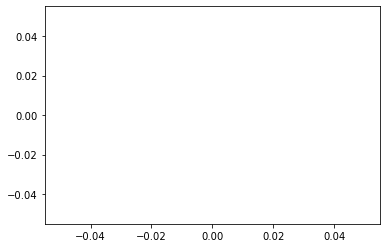

In [14]:
import matplotlib.pyplot as plt
import numpy

hl, = plt.plot([], [])

def update_line(hl, new_data):
    hl.set_xdata(numpy.append(hl.get_xdata(), new_data[0]))
    hl.set_ydata(numpy.append(hl.get_ydata(), new_data[1]))
    plt.draw()

In [10]:
import serial     
import time 

#Inicial conditions
ledFlu=0
ledOD=0
vFlu=0
vOD=0

serialArduino = serial.Serial("COM4",9600,timeout=1.0)


#This funtion control the state of the LEDs
def Assing_LED(ledFlu,ledOD):
    dat = str(ledFlu) + ","+ str(ledOD)
    serialArduino.write(dat.encode('ascii'))
    return

'''**********************
*      MODES MENU      *
************************
*                      *
*  F >> Fluorence mode *
*  O >> OD mode        *
*  M >> Monitor mode   *
*                      *
************************'''


Mode='F'

if opcion=='F': #Fluorence mode
    Assing_LED(1,0)
    
  elif opcion=='O': #Optical density mode
    Assing_LED(0,1)
    
  elif opcion=='M': #Monitor mode
    Assing_LED(0,0)
    time.sleep(1)
      while True:
        Assing_LED(1,0)
        time.sleep(2)
        Assing_LED(0,1)
        time.sleep(2)
      
  else:
    pass

while True:
  #cad =serialArduino.readline().decode('ascii') 

  datAR =serialArduino.readline().decode('ascii').strip()
  if datAR:         
    pos=datAR.index(",")
    vFlu=int(datAR[:pos])
    vOD=int(datAR[pos+1:])
    if  


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 35)

In [17]:
pip install pyserial

In [18]:
conda install serial

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.




PackagesNotFoundError: The following packages are not available from current channels:

  - serial

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




Thread 1: prints 1Thread 2: prints 2Thread 0: prints 0


Thread 0: prints 0Thread 1: prints 2

Thread 2: prints 4
Thread 1: prints 3Thread 2: prints 6

Thread 0: prints 0
Thread 0: prints 0Thread 1: prints 4Thread 2: prints 8


Thread 1: prints 5Thread 0: prints 0
Thread 2: prints 10

Thread 1: prints 6Thread 0: prints 0
Thread 2: prints 12

Thread 0: prints 0
Thread 1: prints 7
Thread 2: prints 14
Thread 2: prints 16Thread 1: prints 8

Thread 0: prints 0
Thread 2: prints 18
Thread 1: prints 9Thread 0: prints 0



In [4]:
import serial
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import re
import threading
gData = []
gData.append([0])
gData.append([0])
#Configuramos la gráfica
fig = plt.figure()
ax = fig.add_subplot(111)
hl, = plt.plot(gData[0], gData[1])
plt.ylim(-90, 90)
plt.xlim(0,200)
# Función que se va a ejecutar en otro thread
# y que guardará los datos del serial en 'out_data'
def GetData(out_data):
    with serial.Serial('/dev/ttyUSB1',115200, timeout=1) as ser:
        print(ser.isOpen())
        while True:
        line = ser.readline().decode('utf-8')
        # Si la línea tiene 'Roll' la parseamos y extraemos el valor
        if "Roll" in line:
        res = re.search("Roll: ([-+]?(\d+(\.\d*)?|\.\d+)([eE][-+]?\d+)?)", line)
        # Añadimos el nuevo valor, si hay más de 200 muestras quitamos la primera
        # para que no se nos acumulen demasiados datos en la gráfica
        out_data[1].append( float(res.group(1)) )
        if len(out_data[1]) > 200:
            out_data[1].pop(0)
# Función que actualizará los datos de la gráfica
# Se llama periódicamente desde el 'FuncAnimation'
def update_line(num, hl, data):
    hl.set_data(range(len(data[1])), data[1])
    return hl,
# Configuramos la función que "animará" nuestra gráfica
line_ani = animation.FuncAnimation(fig, update_line, fargs=(hl, gData),
    interval=50, blit=False)
# Configuramos y lanzamos el hilo encargado de leer datos del serial
dataCollector = threading.Thread(target = GetData, args=(gData,))
dataCollector.start()
plt.show()
dataCollector.join()

IndentationError: expected an indented block (Temp/ipykernel_48484/3084675916.py, line 21)

In [19]:
import numpy as np
import pandas as pd

gData = np.zeros((200,3))

city = pd.DataFrame(gData, columns=['City', 'State','Gato'],index=None)
city.to_csv('city.csv')

In [4]:
t

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [5]:


from threading import Thread
from time import sleep
def run(name):
    for x in range(10):
        print("helo "+name)
        sleep(1)
def run1():
    for x in range(10):
        print("hi")
        sleep(1)
T=Thread(target=run,args=("Ayla",))
T1=Thread(target=run1)
T.start()
sleep(0.2)
T1.start()
T.join()
T1.join()
print("Bye")

helo Ayla
hi
helo Ayla
hi
helo Ayla
hi
helo Ayla
hi
helo Ayla
hi
helo Ayla
hi
helo Ayla
hi
helo Ayla
hi
helo Ayla
hi
helo Ayla
hi
Bye


In [1]:
import time
import threading

def timer1():
  global tim1
  tim1=0
  while True:
    time.sleep(0.05)
    tim1 = tim1 + 0.05
    
def timer2():
  global tim2
  tim2=0
  while True:
    time.sleep(0.05)
    tim2 = tim2 + 0.05

    
    
Cronometer = threading.Thread(target = timer1)           
dataCollector = threading.Thread(target = timer2)
dataCollector.start()
Cronometer.start()


if dataCollector.is_alive() == True:
  print("Hola")



Hola


TypeError: 'numpy.float64' object cannot be interpreted as an integer

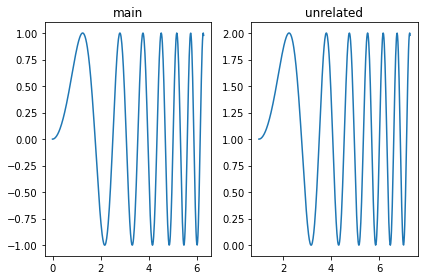

In [14]:
#Add libraries to import a plot in a Tkinterface 
import tkinter
import serial     
import time
import os
import re
import threading
import numpy as np


# Implement the default Matplotlib key bindings.
from matplotlib.backend_bases import key_press_handler
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, NavigationToolbar2Tk)
from matplotlib.figure import Figure
from matplotlib.pyplot import *

fig = Figure(figsize=(5, 4), dpi=100)
t = np.arange(0, 3, .01)
fig.add_subplot(111).plot(t, 2 * np.sin(2 * np.pi * t)

x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)
fig = Figure(figsize=(5, 4), dpi=100)
figsubplots(1, 2)
axs[0].plot(x, y)
axs[0].set_title("main")
axs[1].plot(x + 1, y + 1)
axs[1].set_title("unrelated")

fig.tight_layout()

In [32]:
#Es necesario importar las depencendias necesarias
from datetime import date
from datetime import datetime

#Día actual
today = date.today()

#Fecha actual

format = datetime.now().strftime('%d-%m-%Y, %H;%M;%S')
print(format)

import numpy as np
import pandas as pd

gData = np.zeros((200,3))

city = pd.DataFrame(gData, columns=['City', 'State','Gato'],index=None)
city.to_csv('city('+str(format)+').csv')


07-10-2022, 07;18;03


In [3]:
import numpy as np
gDATA = np.zeros((200,3))

gDATA[:,0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

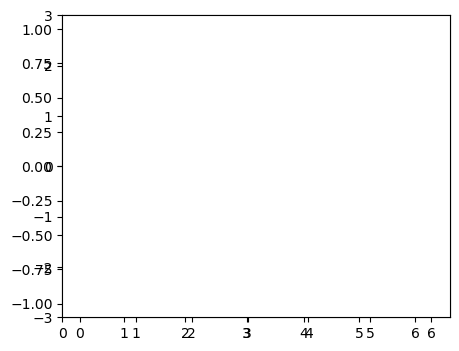

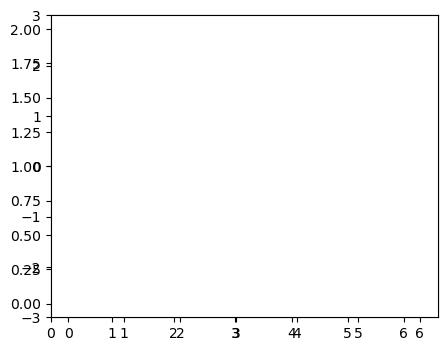

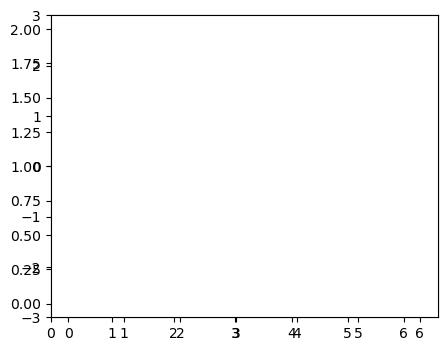

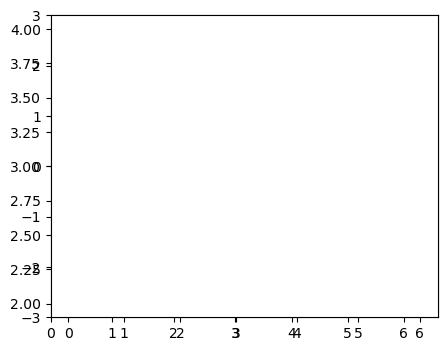

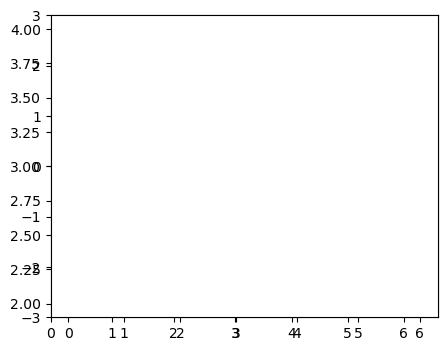

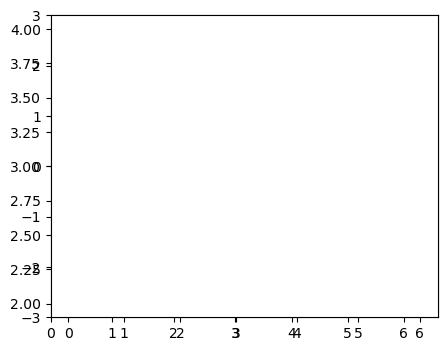

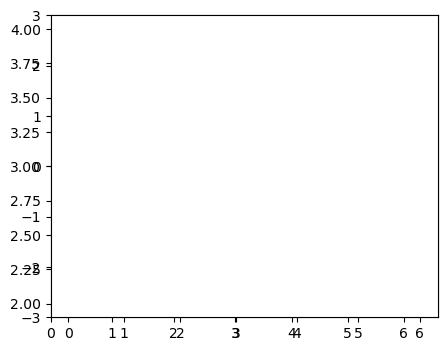

In [13]:
from tkinter import *
from math import  sin
from matplotlib import pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

t = []
for x in list(range(0,101)):
	t.append(x/15.87)

def main():
	root = Tk()
	gui = Window(root)
	gui.root.mainloop()
	return None

class Window:
	def __init__(self, root):
		self.root = root
		self.root.title("Sin Wave")
		self.root.geometry('600x550')
		# A sin(wt + b) + c
		self.amplitude = 1
		self.frequency = 1
		self.vertical_shift = 0
		self.phase_shift = 0
		
		# Amplitude
		Label(self.root, text = "Amplitude").grid(row=0, column=0)
		self.amplitude_entry = Entry(self.root, width = 5)
		self.amplitude_entry.grid(row=0, column = 1)
		
		# Frequency
		Label(self.root, text = "Frequency").grid(row=1, column=0)
		self.frequency_entry = Entry(self.root, width = 5)
		self.frequency_entry.grid(row=1, column=1)
		
		# Vertical Shift
		Label(self.root, text = "Vertical Shift").grid(row=2, column=0)
		self.vertical_shift_entry = Entry(self.root, width = 5)
		self.vertical_shift_entry.grid(row=2, column=1)
		
		# Horizontal Shift
		Label(self.root, text = "Phase Shift").grid(row=3, column=0)
		self.phase_shift_entry = Entry(self.root, width = 5)
		self.phase_shift_entry.grid(row=3, column=1)
		
		# Update Button
		button1 = Button(self.root, text="Calculate", command = self.update_values)
		button1.grid(row=4, column=0)
		self.root.bind("<Return>", self.update_values)
		self.plot_values()
		pass
	
	def update_values(self, event=None):
		self.amplitude = float(self.amplitude_entry.get())
		self.phase_shift = float(self.phase_shift_entry.get())
		self.vertical_shift = float(self.vertical_shift_entry.get())
		self.frequency = float(self.frequency_entry.get())
		self.plot_values()
		return None
	
	def plot_values(self):
		y = []
		for x in t:
			y.append(self.amplitude * sin(self.frequency * x + self.phase_shift) + self.vertical_shift)
		
		figure = plt.figure(figsize = (5,4), dpi = 100)
		figure.add_subplot(111).plot(t,y)
		chart = FigureCanvasTkAgg(figure, self.root)
		chart.get_tk_widget().grid(row = 5, column = 0)
		
		plt.grid()
		axes = plt.axes()
		axes.set_xlim([0, 6.3])
		axes.set_ylim([-3, 3])
		
		return None
	
	pass

main()

C:\Users\drago\anaconda3\lib\site-packages\matplotlib\animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(


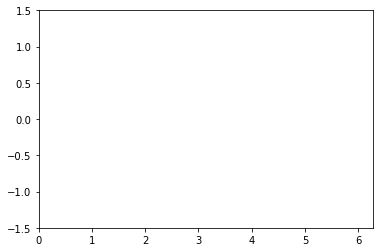

In [3]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

x = np.linspace(0, 2 * np.pi, 100)

# generate 10 curves
y = np.sin(x.reshape(-1, 1) + np.random.uniform(0, 2 * np.pi, (1, 10)))

fig, ax = plt.subplots()
ax.set(xlim=(0, 2 * np.pi), ylim=(-1.5, 1.5))
# lines = [ax.plot([], [], lw=2)[0] for _ in range(y.shape[1])]
lines = ax.plot(np.empty((0, y.shape[1])), np.empty((0, y.shape[1])), lw=2)

def animate(i):
    for line_k, y_k in zip(lines, y.T):
        line_k.set_data(x[:i], y_k[:i])
    return lines

anim = FuncAnimation(fig, animate, frames=x.size, interval=200, repeat=False)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

x = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
x = np.concatenate([x] * 3, axis=1)

# generate 3 curves
y = np.copy(x)
y[:, 0] = np.cos(y[:, 0])
y[:, 1] = np.sin(y[:, 1] )
y[:, 2] = np.sin(y[:, 2] ) + np.cos(y[:, 2])

fig, ax = plt.subplots()
ax = plt.axes(xlim=(0,6), ylim=(-1.5, 1.5))
line1, = ax.plot([], [], lw=2)
line2, = ax.plot([], [], lw=2)
line3, = ax.plot([], [], lw=2)


def animate(i):
    line1.set_data(x[:i, 0], y[:i, 0])
    line2.set_data(x[:i, 1], y[:i, 1])
    line3.set_data(x[:i, 2], y[:i, 2])
    return line1,line2,line3

anim = FuncAnimation(fig, animate, frames=100, interval=200, repeat=False)
plt.show()

In [7]:
conda install nodejs
jupyter labextension install @jupyter-widgets/jupyterlab-manager
jupyter lab build

SyntaxError: invalid syntax (Temp/ipykernel_204612/560373339.py, line 1)

In [8]:
pip install ipympl


In [9]:
pip install nodejs


  Created wheel for nodejs: filename=nodejs-0.1.1-py3-none-any.whl size=3492 sha256=fa2f0cf83eddb2d9f65087610db57408b66088fcdc65bd2216325fad7a6d43f2
  Stored in directory: c:\users\drago\appdata\local\pip\cache\wheels\33\6c\3e\c7c4e543b09f8fc396bb9d2bb0ee2c73d248c49201593c901e
  Created wheel for optional-django: filename=optional_django-0.1.0-py3-none-any.whl size=9978 sha256=14bfecc786a7aa517b298a26c65680995f4254aab05b69bb574c74a486fd97c8
  Stored in directory: c:\users\drago\appdata\local\pip\cache\wheels\02\8b\80\98951377d9c707978a3798a23f2b260e00bcfc724073556cf4
Successfully built nodejs optional-django


In [10]:
jupyter labextension install @jupyter-widgets/jupyterlab-manager

SyntaxError: invalid syntax (Temp/ipykernel_204612/2471653659.py, line 1)

In [11]:
jupyter labextension install jupyter-matplotlib

SyntaxError: invalid syntax (Temp/ipykernel_204612/1642669591.py, line 1)

In [1]:
conda install ipympl
jupyter lab build

SyntaxError: invalid syntax (Temp/ipykernel_62160/4153054873.py, line 1)

In [1]:
pip install nodejs


Note: you may need to restart the kernel to use updated packages.


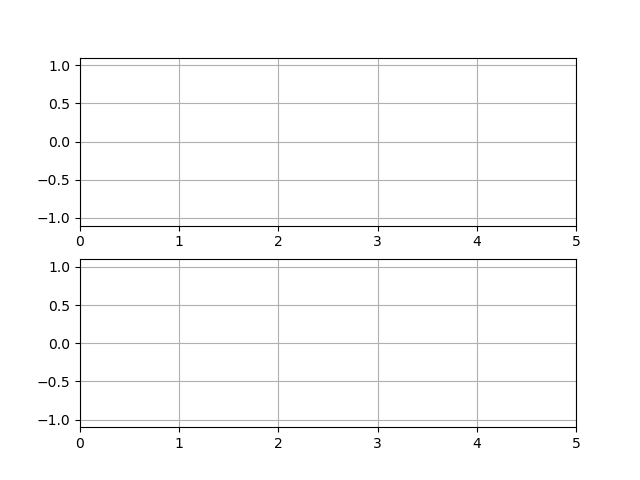

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def data_gen():
    t = data_gen.t
    cnt = 0
    while cnt < 1000:
        cnt+=1
        t += 0.05
        y1 = np.sin(2*np.pi*t) * np.exp(-t/10.)
        y2 = np.cos(2*np.pi*t) * np.exp(-t/10.)
        # adapted the data generator to yield both sin and cos
        yield t, y1, y2

data_gen.t = 0

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2,1)

# intialize two line objects (one in each axes)
line1, = ax1.plot([], [], lw=2)
line2, = ax2.plot([], [], lw=2, color='r')
line = [line1, line2]

# the same axes initalizations as before (just now we do it for both of them)
for ax in [ax1, ax2]:
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 5)
    ax.grid()

# initialize the data arrays 
xdata, y1data, y2data = [], [], []
def run(data):
    # update the data
    t, y1, y2 = data
    xdata.append(t)
    y1data.append(y1)
    y2data.append(y2)

    # axis limits checking. Same as before, just for both axes
    for ax in [ax1, ax2]:
        xmin, xmax = ax.get_xlim()
        if t >= xmax:
            ax.set_xlim(xmin, 2*xmax)
            ax.figure.canvas.draw()

    # update the data of both line objects
    line[0].set_data(xdata, y1data)
    line[1].set_data(xdata, y2data)

    return line

ani = animation.FuncAnimation(fig, run, data_gen, blit=True, interval=10,
    repeat=False)
plt.show()

In [14]:
gDATA = []
gDATA.append([])
gDATA.append([])
gDATA.append([])
gDATA[0].append(1)
gDATA[0].append(2)
gDATA[0].append(3)
gDATA[0].append(4)
gDATA[0].pop(0)
gDATA


[[2, 3, 4], [], []]

In [1]:
import tkinter
import time
 

Window_Width=800

Window_Height=600

Ball_Start_XPosition = 50

Ball_Start_YPosition = 50

Ball_Radius = 30

Ball_min_movement = 5

Refresh_Sec = 0.01
 

def create_animation_window():
  Window = tkinter.Tk()
  Window.title("Python Guides")

  Window.geometry(f'{Window_Width}x{Window_Height}')
  return Window
 

def create_animation_canvas(Window):
  canvas = tkinter.Canvas(Window)
  canvas.configure(bg="Blue")
  canvas.pack(fill="both", expand=True)
  return canvas
 

def animate_ball(Window, canvas,xinc,yinc):
  ball = canvas.create_oval(Ball_Start_XPosition-Ball_Radius,
            Ball_Start_YPosition-Ball_Radius,
            Ball_Start_XPosition+Ball_Radius,
            Ball_Start_YPosition+Ball_Radius,
            fill="Red", outline="Black", width=4)
  while True:
    canvas.move(ball,xinc,yinc)
    Window.update()
    time.sleep(Refresh_Sec)
    ball_pos = canvas.coords(ball)
    # unpack array to variables
    al,bl,ar,br = ball_pos
    if al < abs(xinc) or ar > Window_Width-abs(xinc):
      xinc = -xinc
    if bl < abs(yinc) or br > Window_Height-abs(yinc):
      yinc = -yinc
 

Animation_Window = create_animation_window()
Animation_canvas = create_animation_canvas(Animation_Window)
animate_ball(Animation_Window,Animation_canvas, Ball_min_movement, Ball_min_movement)

TclError: invalid command name ".!canvas"

In [6]:
from datetime import date
from datetime import datetime

format=datetime.now().strftime('%d-%m-%Y, %H;%M;%S')
format

'08-10-2022, 11;23;08'

In [41]:
#---------Imports
from numpy import arange, sin, pi
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
import tkinter as Tk
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
#---------End of imports

fig = plt.Figure()

x = np.arange(0, 2*np.pi, 0.01)        # x-array

def animate(i):
    line.set_ydata(np.sin(x+i/10.0))  # update the data
    return line,

root = Tk.Tk()

label = Tk.Label(root,text="SHM Simulation").grid(column=0, row=0)

canvas1 = FigureCanvasTkAgg(fig, master=root)
canvas.get_tk_widget().grid(column=0,row=1)

ax = fig.add_subplot(111)
line, = ax.plot(x, np.sin(x))
ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), interval=25, blit=False)

Tk.mainloop()